In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('C:\\Users\\lenovo\\Desktop\\courses\\Task 1\\Metadata_Country_API_SP.POP.2529.FE.5Y_DS2_en_csv_v2_52627.csv', sep=',')


In [4]:
df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [5]:
print("Les premières lignes du DataFrame :")
print(df.head())

Les premières lignes du DataFrame :
  Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2                  Afghanistan         NaN  
3   Africa Western and Central         NaN  
4    

In [6]:
print("\nInformations sur le DataFrame :")
print(df.info())


Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  126 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB
None


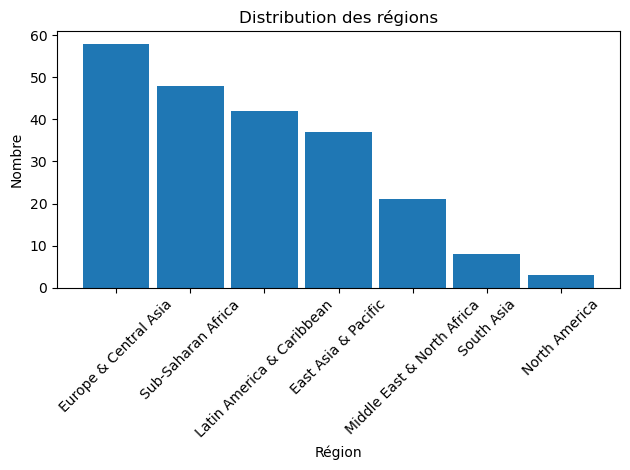

In [9]:

region_counts = df['Region'].value_counts()

bar_width = 0.9


plt.bar(region_counts.index, region_counts.values, width=bar_width)

plt.xlabel('Région')
plt.ylabel('Nombre')
plt.title('Distribution des régions')

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


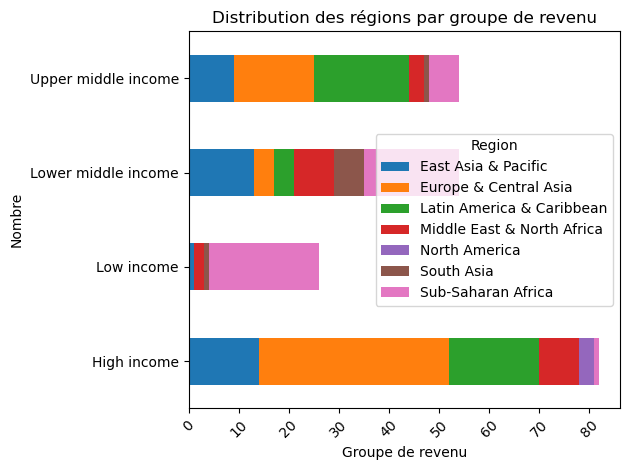

In [10]:
region_income_counts = df.groupby(['IncomeGroup', 'Region']).size()

region_income_counts.unstack().plot(kind='barh', stacked=True)

plt.xlabel('Groupe de revenu')
plt.ylabel('Nombre')
plt.title('Distribution des régions par groupe de revenu')

plt.xticks(rotation=45)

plt.legend(title='Region')

plt.tight_layout()
plt.show()


In [14]:
print(region_income_counts)


IncomeGroup          Region                    
High income          East Asia & Pacific           14
                     Europe & Central Asia         38
                     Latin America & Caribbean     18
                     Middle East & North Africa     8
                     North America                  3
                     Sub-Saharan Africa             1
Low income           East Asia & Pacific            1
                     Middle East & North Africa     2
                     South Asia                     1
                     Sub-Saharan Africa            22
Lower middle income  East Asia & Pacific           13
                     Europe & Central Asia          4
                     Latin America & Caribbean      4
                     Middle East & North Africa     8
                     South Asia                     6
                     Sub-Saharan Africa            19
Upper middle income  East Asia & Pacific            9
                     Europe & Cent

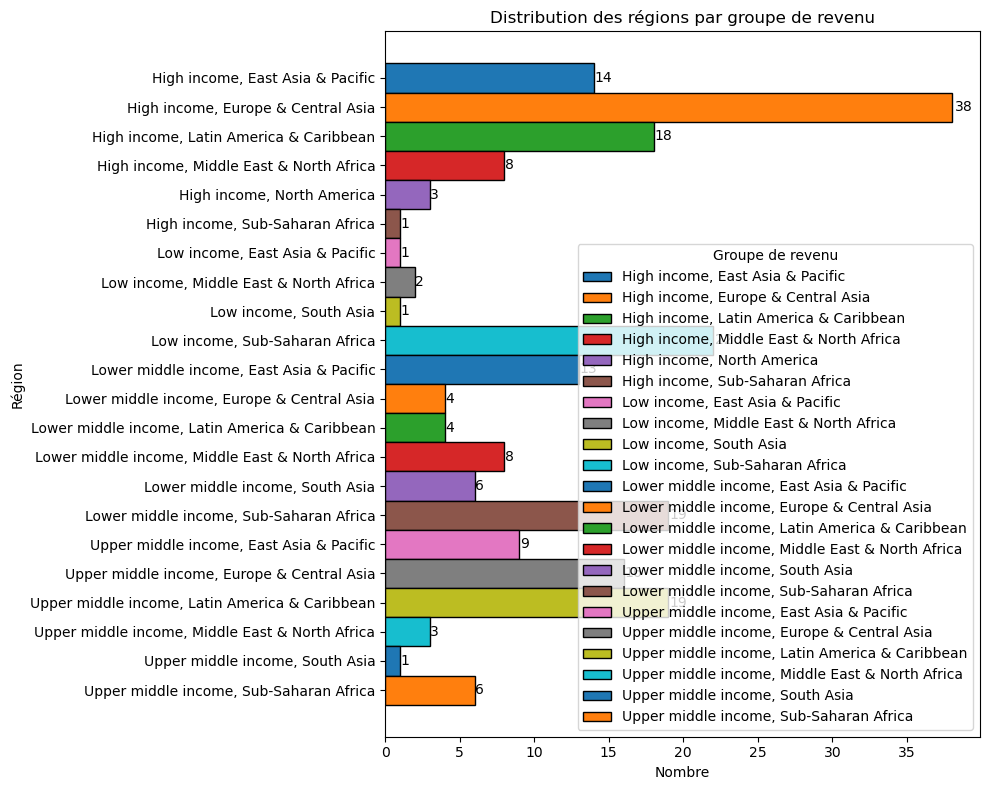

In [17]:

region_income_counts = df.groupby(['IncomeGroup', 'Region']).size()

region_income_counts.index = region_income_counts.index.map(lambda x: ', '.join(x))

fig, ax = plt.subplots(figsize=(10, 8))

for i, (income_group, region_counts) in enumerate(region_income_counts.groupby(level=0)):
    ax.barh(region_counts.index, region_counts.values, label=income_group, height=1.0, edgecolor='black')

plt.xlabel('Nombre')
plt.ylabel('Région')
plt.title('Distribution des régions par groupe de revenu')

for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() + p.get_height() / 2), va='center')

plt.legend(title='Groupe de revenu')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
